# Exploring the QM9 data set

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import sparse

### Importing the representations and the properties

In [3]:
energy_U0_array = np.load('data/energy_U0_array.npy')

In [4]:
free_energy_array = np.load('data/free_energy_array.npy')

In [5]:
CM_matrices_trace = np.load('data/CM_matrices_trace.npy')

In [6]:
CM_matrices_sum = np.load('data/CM_matrices_sum.npy')

In [7]:
CM_matrices_max_eig = np.load('data/CM_matrices_max_eig.npy')

In [8]:
CM_matrices_min_eig = np.load('data/CM_matrices_min_eig.npy')

In [9]:
gap_array = np.load('data/gap_array.npy')

In [10]:
heat_capacity_array = np.load('data/heat_capacity_array.npy')

In [11]:
num_CNOF_atoms = np.load('data/num_CNOF_atoms.npy')

In [12]:
num_atoms = np.load('data/num_atoms.npy')

In [38]:
electronic_spatial_extent_array = np.load('data/electronic_spatial_extent.npy')

# Plotting

### Functions to make plot look nice

In [40]:
def fid_fig():
    """
    Set pyplot parameters for nice plots
    """ 

    COLOR = '#393e41'   
#     COLOR = 'black'

    fig_width_pt = 2*246.0                  # Get this from LaTeX using \showthe\columnwidth
    inches_per_pt = 1.0/72.27               # Convert pt to inch
    golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
    fig_width = fig_width_pt*inches_per_pt  # width in inches
    fig_height = fig_width*golden_mean      # height in inches
    fig_size =  [fig_width,fig_height]
    # Explicitly set fontsizes:
    font_size = 14
    tick_size = 16
    params = {
              #'backend': 'ps',
              'axes.labelsize':  font_size,
              'axes.labelcolor': COLOR,
              'axes.spines.right': True,    # Toggle right axis
              'axes.spines.top':   True,    # Toggle top axis
              'axes.edgecolor':   COLOR,
              'font.size':       font_size, # UserWarning: text.fontsize is deprecated and replaced with font.size
              'legend.fontsize': tick_size,
              'xtick.labelsize': tick_size,
              'xtick.color':     COLOR,
              'ytick.labelsize': tick_size,
              'ytick.color':     COLOR,
              'text.color':      COLOR,
              'xtick.direction': 'in',
              'ytick.direction': 'in',
              'text.usetex':     False,
              'figure.figsize':  fig_size,
#               'font.family':     'sans-serif',
#               'font.sans-serif': 'Kailasa'
              }
    mpl.rcParams.update(params)
    adjustprops = dict(right=0.95, left=0.14, bottom=0.17, top=0.93, 
                       wspace=0.0, hspace=0.0)  

    figprops = dict(figsize=(1.0*fig_width,1.0*fig_height)) 

    def subplots_adjust(fig, props):
        fig.subplots_adjust(left=props['left'])
        fig.subplots_adjust(right=props['right'])
        fig.subplots_adjust(bottom=props['bottom'])
        fig.subplots_adjust(top=props['top'])
        fig.subplots_adjust(wspace=props['wspace'])
        fig.subplots_adjust(hspace=props['hspace'])
        
def multi_fig():
    """
    Set pyplot parameters for nice plots
    """ 

    COLOR = '#393e41'   
#     COLOR = 'black'

    fig_width_pt = 2*246.0                  # Get this from LaTeX using \showthe\columnwidth
    inches_per_pt = 1.0/72.27               # Convert pt to inch
    golden_mean = 1.25*(np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
    fig_width = fig_width_pt*inches_per_pt  # width in inches
    fig_height = fig_width*golden_mean      # height in inches
    fig_size =  [(4/3)*2*fig_width,2*fig_height]
    # Explicitly set fontsizes:
    font_size = 14
    tick_size = 16
    params = {
              #'backend': 'ps',
              'axes.labelsize':  font_size,
              'axes.labelcolor': COLOR,
              'axes.spines.right': True,    # Toggle right axis
              'axes.spines.top':   True,    # Toggle top axis
              'axes.edgecolor':   COLOR,
              'font.size':       font_size, # UserWarning: text.fontsize is deprecated and replaced with font.size
              'legend.fontsize': tick_size,
              'xtick.labelsize': tick_size,
              'xtick.color':     COLOR,
              'ytick.labelsize': tick_size,
              'ytick.color':     COLOR,
              'text.color':      COLOR,
              'xtick.direction': 'in',
              'ytick.direction': 'in',
              'text.usetex':     False,
              'figure.figsize':  fig_size,
#               'font.family':     'sans-serif',
#               'font.sans-serif': 'Kailasa'
              }
    mpl.rcParams.update(params)
    adjustprops = dict(right=0.95, left=0.14, bottom=0.17, top=0.93, 
                       wspace=0.0, hspace=0.0)  

    figprops = dict(figsize=(1.0*fig_width,1.0*fig_height)) 

    def subplots_adjust(fig, props):
        fig.subplots_adjust(left=props['left'])
        fig.subplots_adjust(right=props['right'])
        fig.subplots_adjust(bottom=props['bottom'])
        fig.subplots_adjust(top=props['top'])
        fig.subplots_adjust(wspace=props['wspace'])
        fig.subplots_adjust(hspace=props['hspace'])

### Energy $U_0$ vs sum of Coulomb Matrix

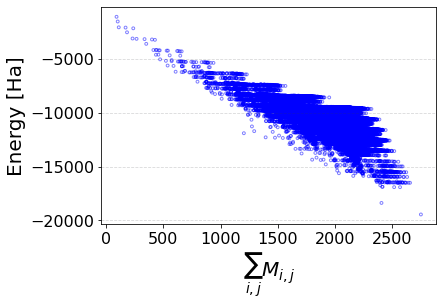

In [14]:
fig, axs = plt.subplots()

axs.grid(True, which='major', axis='y', alpha = 0.2, linestyle = '--', color='#393e41')


axs.scatter(CM_matrices_sum, energy_U0_array, alpha=0.5, s = 8, facecolors='none', edgecolors='b')

# axs.set_ylim(0,16) 
# axs.set_xlim(0,16) 
axs.set_xlabel(r'$\sum_{i,j} M_{i,j}$', fontsize=20)
axs.set_ylabel(r'Energy [Ha]', fontsize=20)
axs.tick_params(axis='y', labelsize=16)
axs.tick_params(axis='x', labelsize=16)
# axs.yaxis.set_major_locator(plt.MultipleLocator(2))
# axs.xaxis.set_major_locator(plt.MultipleLocator(2))



# axs.legend(loc=4, fontsize=12)

plt.show()
# fig.savefig('2_qubits_Lie_rank_vs_params.pdf', bbox_inches='tight', transparent=False)

### Energy $U_0$ vs Trace of Coulomb Matrix

#### First, we fit the data

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression().fit(CM_matrices_trace.reshape(-1,1), energy_U0_array.reshape(-1,1))
r_sq = model.score(CM_matrices_trace.reshape(-1,1), energy_U0_array.reshape(-1,1))

slope = model.coef_[0][0]
intercept = model.intercept_[0]

MSE = mean_squared_error(energy_U0_array, slope*CM_matrices_trace+intercept)
MAE = mean_absolute_error(energy_U0_array, slope*CM_matrices_trace+intercept)

In [16]:
print('MSE = ', MSE)
print('MAE = ', MAE)

MSE =  181.51810304615805
MAE =  10.100550098978333


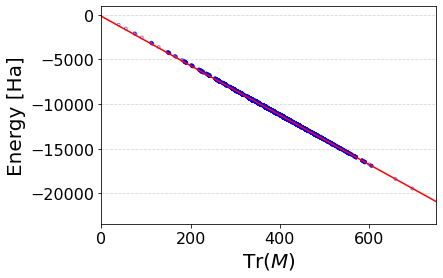

In [17]:
fig, axs = plt.subplots()

x_lin = np.arange(0,900,100)
y_lin = slope * x_lin + intercept

axs.grid(True, which='major', axis='y', alpha = 0.2, linestyle = '--', color='#393e41')

axs.plot(x_lin, y_lin, linestyle = '-', color='red')
axs.scatter(CM_matrices_trace, energy_U0_array, alpha=0.5, s = 8, facecolors='none', edgecolors='b')

# axs.set_ylim(0,16) 
axs.set_xlim(0,750) 
axs.set_xlabel(r'Tr$(M)$', fontsize=20)
axs.set_ylabel(r'Energy [Ha]', fontsize=20)
axs.tick_params(axis='y', labelsize=16)
axs.tick_params(axis='x', labelsize=16)
# axs.yaxis.set_major_locator(plt.MultipleLocator(2))
# axs.xaxis.set_major_locator(plt.MultipleLocator(2))



# axs.legend(loc=4, fontsize=12)

plt.show()
# fig.savefig('2_qubits_Lie_rank_vs_params.pdf', bbox_inches='tight', transparent=False)

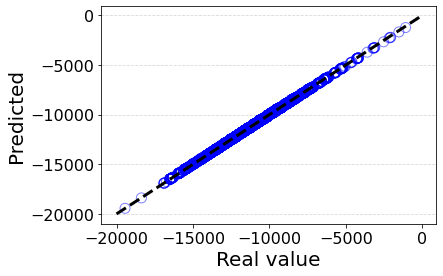

In [27]:
fig, axs = plt.subplots()

x_lin = np.arange(-20000,0,100)
# y_lin = slope * x_lin + intercept

axs.grid(True, which='major', axis='y', alpha = 0.2, linestyle = '--', color='#393e41')

axs.plot(x_lin, x_lin, linestyle = '--', linewidth=3, color='black')
axs.scatter(energy_U0_array, slope * CM_matrices_trace + intercept, alpha=0.5, s = 100, facecolors='none', edgecolors='b')


axs.set_xlabel(r'Real value', fontsize=20)
axs.set_ylabel(r'Predicted', fontsize=20)
axs.tick_params(axis='y', labelsize=16)
axs.tick_params(axis='x', labelsize=16)
axs.title('')


# axs.legend(loc=4, fontsize=12)

plt.show()
# fig.savefig('2_qubits_Lie_rank_vs_params.pdf', bbox_inches='tight', transparent=False)

### Gap vs Trace of Coulomb Matrix

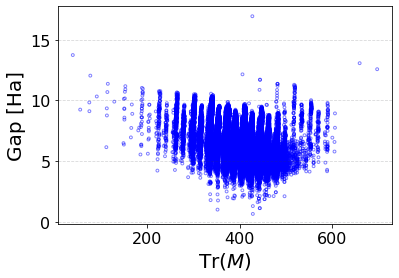

In [28]:
fig, axs = plt.subplots()

axs.grid(True, which='major', axis='y', alpha = 0.2, linestyle = '--', color='#393e41')


axs.scatter(CM_matrices_trace, gap_array, alpha=0.5, s = 8, facecolors='none', edgecolors='b')

# axs.set_ylim(0,16) 
# axs.set_xlim(0,16) 
axs.set_xlabel(r'Tr$(M)$', fontsize=20)
axs.set_ylabel(r'Gap [Ha]', fontsize=20)
axs.tick_params(axis='y', labelsize=16)
axs.tick_params(axis='x', labelsize=16)
# axs.yaxis.set_major_locator(plt.MultipleLocator(2))
# axs.xaxis.set_major_locator(plt.MultipleLocator(2))



# axs.legend(loc=4, fontsize=12)

plt.show()
# fig.savefig('2_qubits_Lie_rank_vs_params.pdf', bbox_inches='tight', transparent=False)

### Heat capacity vs Trace of Coulomb Matrix

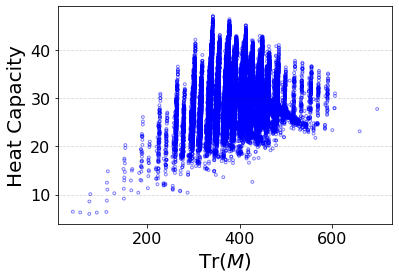

In [29]:
fig, axs = plt.subplots()

axs.grid(True, which='major', axis='y', alpha = 0.2, linestyle = '--', color='#393e41')


axs.scatter(CM_matrices_trace, heat_capacity_array, alpha=0.5, s = 8, facecolors='none', edgecolors='b')

# axs.set_ylim(0,16) 
# axs.set_xlim(0,16) 
axs.set_xlabel(r'Tr$(M)$', fontsize=20)
axs.set_ylabel(r'Heat Capacity', fontsize=20)
axs.tick_params(axis='y', labelsize=16)
axs.tick_params(axis='x', labelsize=16)
# axs.yaxis.set_major_locator(plt.MultipleLocator(2))
# axs.xaxis.set_major_locator(plt.MultipleLocator(2))



# axs.legend(loc=4, fontsize=12)

plt.show()
# fig.savefig('2_qubits_Lie_rank_vs_params.pdf', bbox_inches='tight', transparent=False)

### Energy vs max of diag Coulomb Matrix

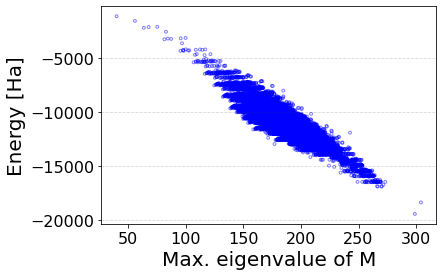

In [30]:
fig, axs = plt.subplots()

axs.grid(True, which='major', axis='y', alpha = 0.2, linestyle = '--', color='#393e41')


axs.scatter(CM_matrices_max_eig, energy_U0_array, alpha=0.5, s = 8, facecolors='none', edgecolors='b')

# axs.set_ylim(0,16) 
# axs.set_xlim(0,16) 
axs.set_xlabel(r'Max. eigenvalue of M', fontsize=20)
axs.set_ylabel(r'Energy [Ha]', fontsize=20)
axs.tick_params(axis='y', labelsize=16)
axs.tick_params(axis='x', labelsize=16)
# axs.yaxis.set_major_locator(plt.MultipleLocator(2))
# axs.xaxis.set_major_locator(plt.MultipleLocator(2))



# axs.legend(loc=4, fontsize=12)

plt.show()
# fig.savefig('2_qubits_Lie_rank_vs_params.pdf', bbox_inches='tight', transparent=False)

### Energy vs min of diag Coulomb Matrix

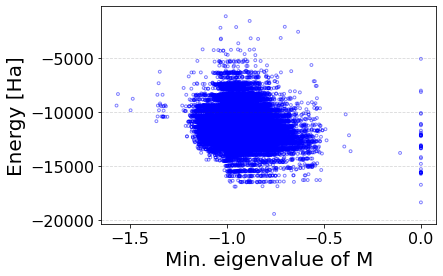

In [31]:
fig, axs = plt.subplots()

axs.grid(True, which='major', axis='y', alpha = 0.2, linestyle = '--', color='#393e41')


axs.scatter(CM_matrices_min_eig, energy_U0_array, alpha=0.5, s = 8, facecolors='none', edgecolors='b')

# axs.set_ylim(0,16) 
# axs.set_xlim(0,16) 
axs.set_xlabel(r'Min. eigenvalue of M', fontsize=20)
axs.set_ylabel(r'Energy [Ha]', fontsize=20)
axs.tick_params(axis='y', labelsize=16)
axs.tick_params(axis='x', labelsize=16)
# axs.yaxis.set_major_locator(plt.MultipleLocator(2))
# axs.xaxis.set_major_locator(plt.MultipleLocator(2))



# axs.legend(loc=4, fontsize=12)

plt.show()
# fig.savefig('2_qubits_Lie_rank_vs_params.pdf', bbox_inches='tight', transparent=False)

### Free energy at 300K vs Trace of Coulomb Matrix

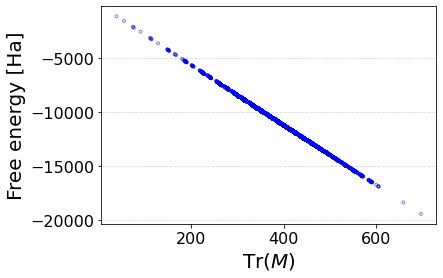

In [32]:
fig, axs = plt.subplots()

axs.grid(True, which='major', axis='y', alpha = 0.2, linestyle = '--', color='#393e41')


axs.scatter(CM_matrices_trace, free_energy_array, alpha=0.5, s = 8, facecolors='none', edgecolors='b')

# axs.set_ylim(0,16) 
# axs.set_xlim(0,16) 
axs.set_xlabel(r'Tr$(M)$', fontsize=20)
axs.set_ylabel(r'Free energy [Ha]', fontsize=20)
axs.tick_params(axis='y', labelsize=16)
axs.tick_params(axis='x', labelsize=16)
# axs.yaxis.set_major_locator(plt.MultipleLocator(2))
# axs.xaxis.set_major_locator(plt.MultipleLocator(2))



# axs.legend(loc=4, fontsize=12)

plt.show()
# fig.savefig('2_qubits_Lie_rank_vs_params.pdf', bbox_inches='tight', transparent=False)

### Energy vs size of molecule

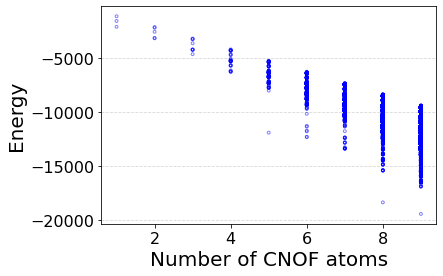

In [33]:
fig, axs = plt.subplots()

axs.grid(True, which='major', axis='y', alpha = 0.2, linestyle = '--', color='#393e41')


axs.scatter(num_CNOF_atoms, energy_U0_array, alpha=0.5, s = 8, facecolors='none', edgecolors='b')

# axs.set_ylim(0,16) 
# axs.set_xlim(0,16) 
axs.set_xlabel(r'Number of CNOF atoms', fontsize=20)
axs.set_ylabel(r'Energy', fontsize=20)
axs.tick_params(axis='y', labelsize=16)
axs.tick_params(axis='x', labelsize=16)
# axs.yaxis.set_major_locator(plt.MultipleLocator(2))
# axs.xaxis.set_major_locator(plt.MultipleLocator(2))



# axs.legend(loc=4, fontsize=12)

plt.show()
# fig.savefig('2_qubits_Lie_rank_vs_params.pdf', bbox_inches='tight', transparent=False)

### Energy vs electronic_spatial_extent

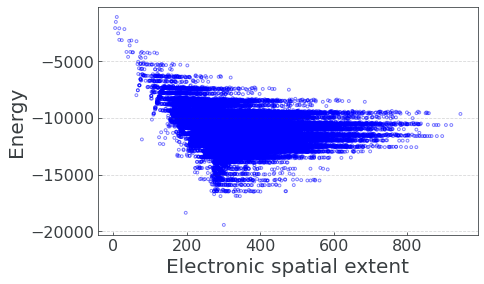

In [41]:
fid_fig()
fig, axs = plt.subplots()

axs.grid(True, which='major', axis='y', alpha = 0.2, linestyle = '--', color='#393e41')


axs.scatter(electronic_spatial_extent_array, energy_U0_array, alpha=0.5, s = 8, facecolors='none', edgecolors='b')

# axs.set_ylim(0,16) 
# axs.set_xlim(0,16) 
axs.set_xlabel(r'Electronic spatial extent', fontsize=20)
axs.set_ylabel(r'Energy', fontsize=20)
axs.tick_params(axis='y', labelsize=16)
axs.tick_params(axis='x', labelsize=16)
# axs.yaxis.set_major_locator(plt.MultipleLocator(2))
# axs.xaxis.set_major_locator(plt.MultipleLocator(2))



# axs.legend(loc=4, fontsize=12)

plt.show()
# fig.savefig('2_qubits_Lie_rank_vs_params.pdf', bbox_inches='tight', transparent=False)

## Collecting everything in a single plot

In [42]:
colors = {'greenish': '#1a9988', 'redish': '#eb5600', 'blueish': '#6aa4c8', 'darkblueish': '#1c3678', 'beigeish': '#ffb8a2'}
markersize = 30

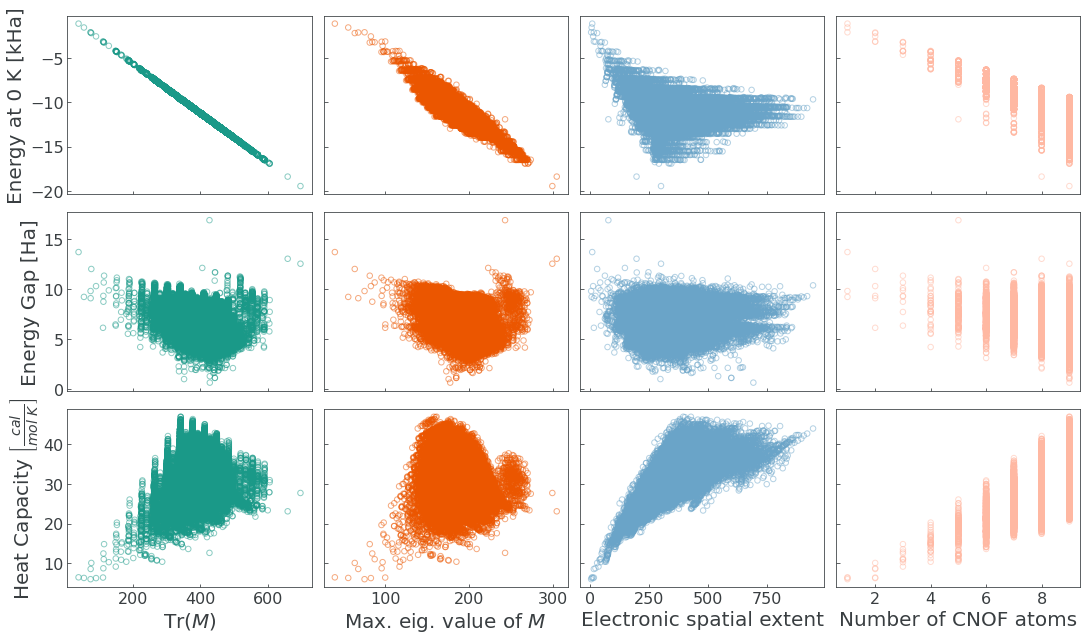

In [43]:
multi_fig()

fig, axs = plt.subplots(3, 4, gridspec_kw={'hspace': 0.1, 'wspace':0.05})

axs[0,0].scatter(CM_matrices_trace, energy_U0_array/1000, alpha=0.5, s = markersize, facecolors='none', edgecolors=colors['greenish'])
axs[1,0].scatter(CM_matrices_trace, gap_array, alpha=0.5, s = markersize, facecolors='none', edgecolors=colors['greenish'])
axs[2,0].scatter(CM_matrices_trace, heat_capacity_array, alpha=0.5, s = markersize, facecolors='none', edgecolors=colors['greenish'])

axs[0,1].scatter(CM_matrices_max_eig, energy_U0_array/1000, alpha=0.5, s = markersize, facecolors='none', edgecolors=colors['redish'])
axs[1,1].scatter(CM_matrices_max_eig, gap_array, alpha=0.5, s = markersize, facecolors='none', edgecolors=colors['redish'])
axs[2,1].scatter(CM_matrices_max_eig, heat_capacity_array, alpha=0.5, s = markersize, facecolors='none', edgecolors=colors['redish'])

axs[0,2].scatter(electronic_spatial_extent_array, energy_U0_array/1000, alpha=0.5, s = markersize, facecolors='none', edgecolors=colors['blueish'])
axs[1,2].scatter(electronic_spatial_extent_array, gap_array, alpha=0.5, s = markersize, facecolors='none', edgecolors=colors['blueish'])
axs[2,2].scatter(electronic_spatial_extent_array, heat_capacity_array, alpha=0.5, s = markersize, facecolors='none', edgecolors=colors['blueish'])

axs[0,3].scatter(num_CNOF_atoms, energy_U0_array/1000, alpha=0.5, s = markersize, facecolors='none', edgecolors=colors['beigeish'])
axs[1,3].scatter(num_CNOF_atoms, gap_array, alpha=0.5, s = markersize, facecolors='none', edgecolors=colors['beigeish'])
axs[2,3].scatter(num_CNOF_atoms, heat_capacity_array, alpha=0.5, s = markersize, facecolors='none', edgecolors=colors['beigeish'])

axs[0,0].set_ylabel(r'Energy at 0 K [kHa]', fontsize=20)
axs[1,0].set_ylabel(r'Energy Gap [Ha]', fontsize=20)
axs[2,0].set_ylabel(r'Heat Capacity $\left[ \frac{cal}{mol\ K} \right]$', fontsize=20)

axs[2,0].set_xlabel(r'Tr$(M)$', fontsize=20)
axs[2,1].set_xlabel(r'Max. eig. value of $M$', fontsize=20)
axs[2,2].set_xlabel(r'Electronic spatial extent', fontsize=20)
axs[2,3].set_xlabel(r'Number of CNOF atoms', fontsize=20)


for ax in axs.flat:
    ax.label_outer()
    
# fig.savefig('data_correlations.pdf', bbox_inches='tight')